In [7]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [436]:
a = np.array([[0,19,41,39,27,20],
              [19,0,24,31,35,13],
              [41,24,0,20,41,22],
              [39,31,20,0,26,20],
              [27,35,41,26,0,23],
              [20,13,22,20,23,0]])

In [2]:
def initialize_parameters(n, cost_matrix = None, start_point = 0 ,max_value = 30, initial_solution = None):
    if cost_matrix is not None:
        matrix = cost_matrix
        n = matrix.shape[0]
    else:
        np.random.seed(3)
        b = np.random.random_integers(0,max_value,size=(n,n))
        matrix = (b + b.T)/2
        for i in range(n):
            for j in range(n):
                if i == j:
                    matrix[
                        i][j] = 0
    if initial_solution is not None:
        first_solution = initial_solution
    else:
        first_solution = [start_point] + random.sample(range(1,n), n-1)
    return first_solution, matrix

In [3]:
def calculate_cost(x,m):
    s = 0
    for i in range(len(x)-1):
        s+=m[x[i]][x[i+1]]
        
    return s

In [4]:
def burn_algorithm(curr,m,T = 100, max_iter = 10, learning_rate = 0.9,
              verbose = True, return_type = 'demo'):
    # initialize parameters
#   curr, m = initialize_parameters(n, cost_matrix=cost_matrix, start_point=start_point, max_value=max_value,
#                                   initial_solution = initial_solution)
    costs = list()
    if verbose:
        print("Initial solution: {0}".format(curr))
        print("Shape of data: {0}".format(m.shape))
        print(m)
    n = m.shape[0]
    prew = np.copy(curr)
    max_T = T
    start_time = time.time()
    for i in range(max_iter):
        rand_nbs = random.sample(range(1,n), 2)
        curr[rand_nbs[0]], curr[rand_nbs[1]] = curr[rand_nbs[1]], curr[rand_nbs[0]]
        delta_s = calculate_cost(curr,m) - calculate_cost(prew,m)
        if delta_s < 0:
            prew = np.copy(curr)
        else:
            p = max_T * np.exp(-delta_s/T)
            rand_p = random.uniform(0,max_T)
            if  p>=rand_p:
                prew = np.copy(curr)   
            else:
                curr = np.copy(prew)
        if verbose:
            print("Iteration {0}: cost = {1}, temp =  {2}".format(i,calculate_cost(curr,m),T))
        T*=learning_rate
        costs.append(calculate_cost(curr,m))
    if return_type=='demo':
        return curr,costs
    else:
        return costs[-1],time.time() - start_time
                
        

In [440]:
x_0, m = initialize_parameters(10)
solution, cost = burn_algorithm(x_0,m,max_iter=50,T=100)

Initial solution: [0, 8, 4, 3, 7, 2, 5, 1, 9, 6]
Shape of data: (10, 10)
[[  0.   17.   18.5   2.5  17.   12.   11.   13.   20.   18.5]
 [ 17.    0.   27.   18.5  17.   13.   11.5  17.5  14.   15.5]
 [ 18.5  27.    0.    7.5  25.5  23.    8.5  20.   13.   12.5]
 [  2.5  18.5   7.5   0.   28.   17.5   8.5   7.5   2.   14.5]
 [ 17.   17.   25.5  28.    0.   20.5  14.5   9.   27.   14. ]
 [ 12.   13.   23.   17.5  20.5   0.   17.   10.5  22.   14. ]
 [ 11.   11.5   8.5   8.5  14.5  17.    0.   22.5  20.   18.5]
 [ 13.   17.5  20.    7.5   9.   10.5  22.5   0.   11.5  13. ]
 [ 20.   14.   13.    2.   27.   22.   20.   11.5   0.   23.5]
 [ 18.5  15.5  12.5  14.5  14.   14.   18.5  13.   23.5   0. ]]
Iteration 0: cost = 153.0, temp =  100
Iteration 1: cost = 159.0, temp =  90.0
Iteration 2: cost = 151.0, temp =  81.0
Iteration 3: cost = 159.0, temp =  72.9
Iteration 4: cost = 170.5, temp =  65.61000000000001
Iteration 5: cost = 156.5, temp =  59.049000000000014
Iteration 6: cost = 130.0, tem

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead


In [441]:
x_0, m = initialize_parameters(35)
solution, cost = burn_algorithm(x_0,m,max_iter=300,T=100)

Initial solution: [0, 1, 31, 17, 8, 24, 3, 6, 33, 27, 25, 16, 30, 19, 20, 4, 18, 9, 13, 34, 22, 7, 5, 12, 26, 10, 15, 14, 32, 11, 29, 2, 21, 23, 28]
Shape of data: (35, 35)
[[  0.   14.5  15.  ...,   6.   15.5  23. ]
 [ 14.5   0.   21.5 ...,  24.5  26.   12. ]
 [ 15.   21.5   0.  ...,  22.    9.5   9.5]
 ..., 
 [  6.   24.5  22.  ...,   0.   12.5  26.5]
 [ 15.5  26.    9.5 ...,  12.5   0.   12. ]
 [ 23.   12.    9.5 ...,  26.5  12.    0. ]]
Iteration 0: cost = 526.0, temp =  100
Iteration 1: cost = 498.0, temp =  90.0
Iteration 2: cost = 491.0, temp =  81.0
Iteration 3: cost = 505.5, temp =  72.9
Iteration 4: cost = 502.5, temp =  65.61000000000001
Iteration 5: cost = 502.0, temp =  59.049000000000014
Iteration 6: cost = 500.0, temp =  53.144100000000016
Iteration 7: cost = 500.0, temp =  47.829690000000014
Iteration 8: cost = 481.0, temp =  43.04672100000001
Iteration 9: cost = 481.0, temp =  38.742048900000015
Iteration 10: cost = 469.0, temp =  34.86784401000001
Iteration 11: cost =

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead


In [442]:
def plot_convergence(x):
    plt.figure(figsize=(12,6))
    sns.lineplot(x = range(0,len(x)),y=x)
    plt.title("Збіжність алгоритму імітаційного підпалу")
    plt.xlabel("Номер ітерації")
    plt.ylabel("Оптимізаційна функція")
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead


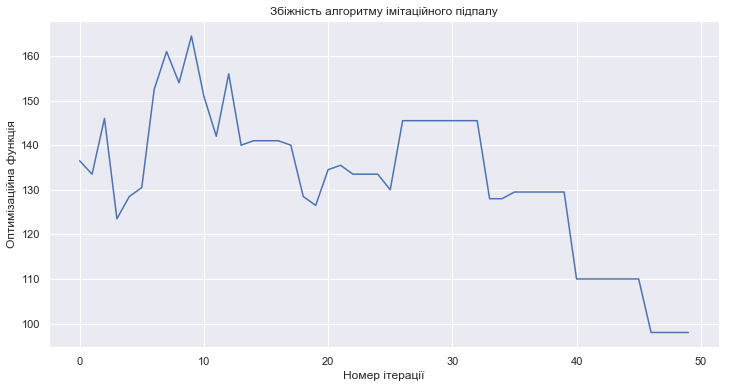

In [443]:
x_0, m = initialize_parameters(10)
solution, cost = burn_algorithm(x_0,m,max_iter=50,T=100, verbose=False)
plot_convergence(cost)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead


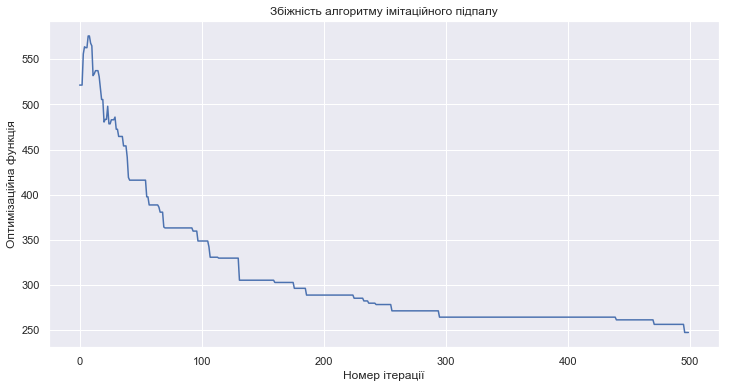

In [444]:
x_0, m = initialize_parameters(35)
solution, cost = burn_algorithm(x_0,m,max_iter=500,T=100, verbose=False)
plot_convergence(cost)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead


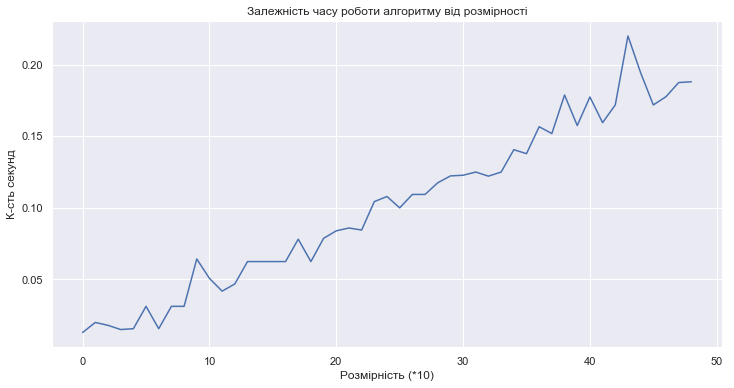

In [12]:
timing = list()
for i in range(10,500,10):
    x_0, m = initialize_parameters(i)
    costs, times = burn_algorithm(x_0,m,max_iter=150,T=100, verbose=False, return_type = 'not demo')
    timing.append(times)
    
plt.figure(figsize=(12,6))
sns.lineplot(x = range(0,len(timing)),y=timing)
plt.title("Залежність часу роботи алгоритму від розмірності")
plt.xlabel("Розмірність (*10)")
plt.ylabel("К-сть секунд")
plt.show()

In [445]:
def get_proba(start, list_of_points, l, mu, beta, alpha):
    s = 0
    for i in zip([start]*len(list_of_points),list_of_points):
        s+=(1/l[i[0]][i[1]])**beta * (mu[i[0]][i[1]])**alpha
    prob = dict()
    for i in zip([start]*len(list_of_points),list_of_points):
        p = 100*((1/l[i[0]][i[1]])**beta * (mu[i[0]][i[1]])**alpha)/s
        prob[i[1]]=p
    return prob
    

In [446]:
def choose_next_point(prob):
    r = np.random.uniform(0,100)
    keys = list(prob.keys())
    if len(keys) == 1:
        return keys[0]
    val = list(prob.values())
    s = val[0]
    next_points = None
    if r < s:
        return keys[0]
    for i in range(1,len(keys)):
        if r< s + val[i]:
            next_points = keys[i]
            return keys[i]
        else:
            if len(keys) == 2:
                next_points = keys[i]
                return keys[i]
            s+= val[i]
    if next_points is None:
        return keys[-1]

In [447]:
def ant_algorithm(m,beta = 1,alpha = 1, max_iter =100, learning_rate = 40, p = 0.4, verbose = False):
    # initialize mu
    n = m.shape[0]
#     np.random.seed(3)
    b = np.random.random_integers(1,3,size=(n,n))
    mu = (b + b.T)/2
    all_points = list([i for i in range(n)])
    costs = list()
    for i in range(max_iter):
        route = list([0])
        while len(route)!=n:
            not_visited_points = set(all_points) - set(route)
            prob = get_proba(route[-1], not_visited_points, m , mu, alpha=alpha, beta=beta)
            next_point = choose_next_point(prob)
            route.append(next_point)
        costs.append(calculate_cost(route,m))
        # update weights
        delta = learning_rate/costs[-1]
        mu = (1-p)*mu +delta
        if verbose:
            print("Iteration {0}: cost {1}, {2}, delta {3}".format(i,costs[-1],route, delta))
    return route,costs
    

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 30 + 1) instead
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead


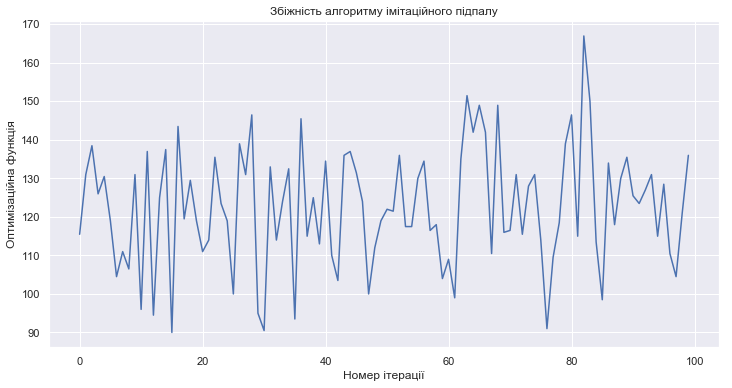

In [450]:
x_0, m = initialize_parameters(10)
rout, costs = ant_algorithm(m)
plot_convergence(costs)